In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns=50

In [2]:
# drop
# LabelEncoder
# 注意缺失值
# 数值类型
# 构建fraud，yx
# 归一化
# 模型函数

In [3]:
import pickle
with open('data.pkl','rb') as f:
    data = pickle.load(f)

In [4]:
data.shape

(180519, 45)

In [5]:
data['Sales per customer']

0         314.640015
1         311.359985
2         309.720001
3         304.809998
4         298.250000
             ...    
180514    399.980011
180515    395.980011
180516    391.980011
180517    387.980011
180518    383.980011
Name: Sales per customer, Length: 180519, dtype: float64

<AxesSubplot:>

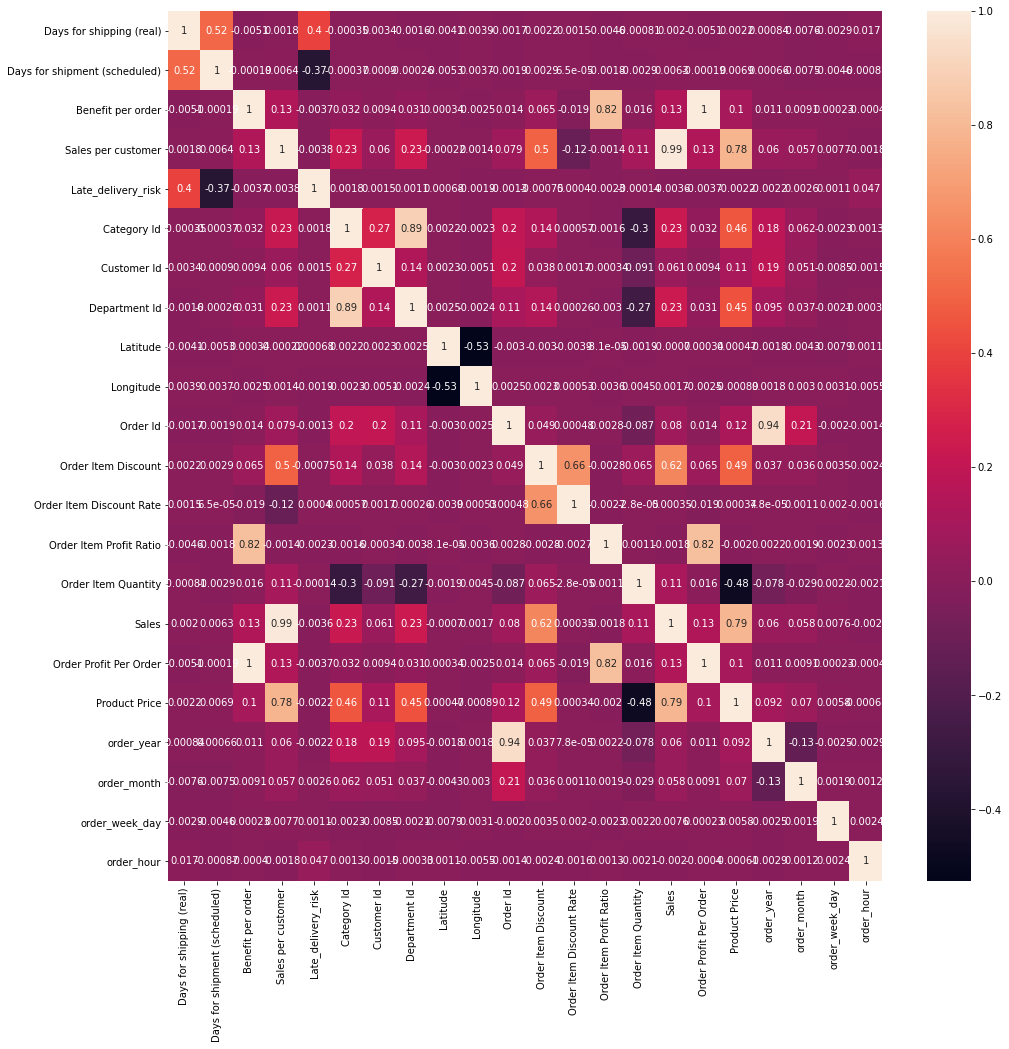

In [6]:
cor = data.corr()
plt.figure(figsize=(16,16))
sns.heatmap(cor, annot=True)

In [7]:
data.drop(columns = ['Sales per customer','Order Profit Per Order','order_year'], inplace=True)

<AxesSubplot:>

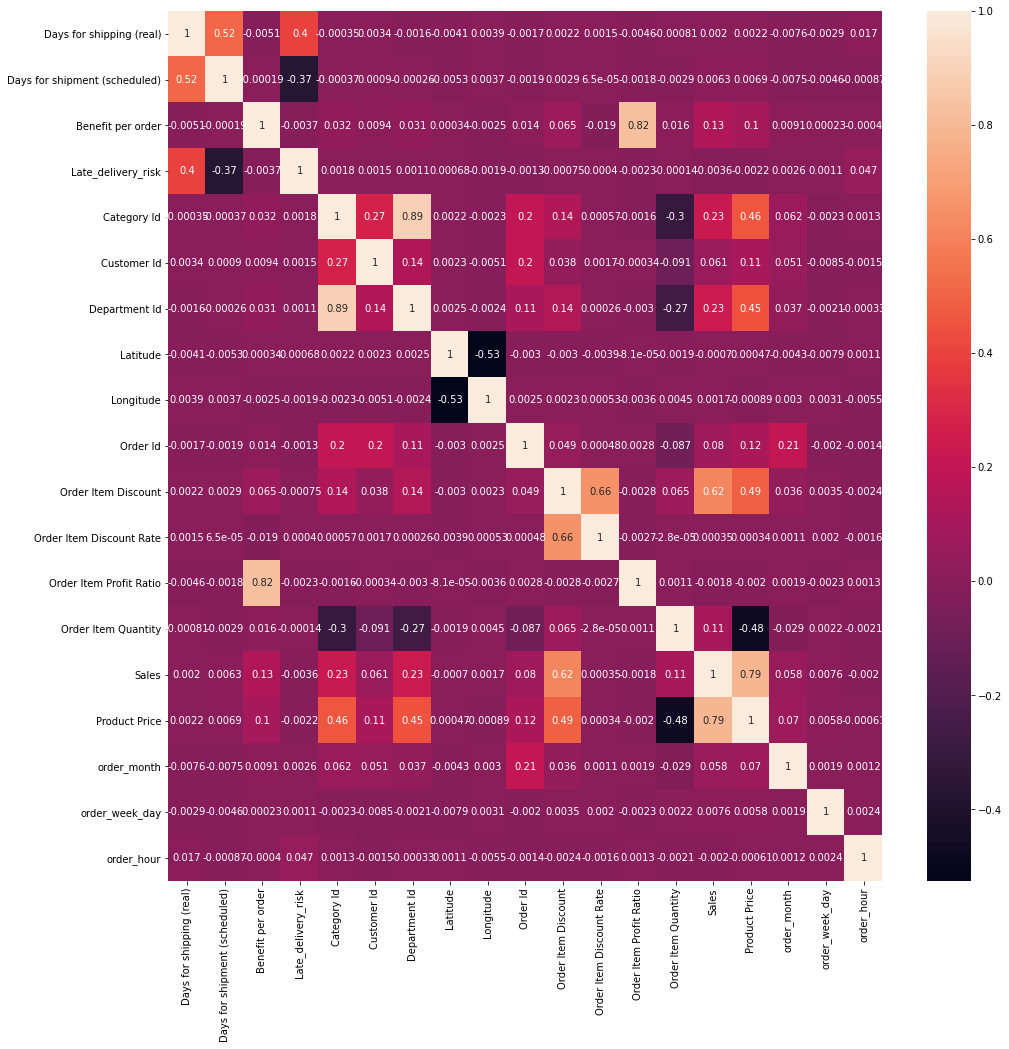

In [8]:
cor = data.corr()
plt.figure(figsize=(16,16))
sns.heatmap(cor, annot=True)

In [9]:
# 分类变量 str

In [10]:
cat_cols = data.select_dtypes(include='object').columns
cat_cols

Index(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Fname', 'Customer Lname',
       'Customer Segment', 'Customer State', 'Customer Street',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'Order Region', 'Order State', 'Order Status', 'Product Name',
       'Shipping Mode', 'Customer FullName'],
      dtype='object')

In [11]:
num_cols = data.select_dtypes(exclude = 'object').columns
num_cols

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Late_delivery_risk', 'Category Id', 'Customer Id',
       'Department Id', 'Latitude', 'Longitude', 'order date (DateOrders)',
       'Order Id', 'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Product Price', 'shipping date (DateOrders)', 'order_month',
       'order_week_day', 'order_hour', 'order_month_year'],
      dtype='object')

In [12]:
data[cat_cols].head()

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Fname,Customer Lname,Customer Segment,Customer State,Customer Street,Department Name,Market,Order City,Order Country,Order Region,Order State,Order Status,Product Name,Shipping Mode,Customer FullName
0,DEBIT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,Cally,Holloway,Consumer,PR,5365 Noble Nectar Island,Fitness,Pacific Asia,Bekasi,Indonesia,Southeast Asia,Java Occidental,COMPLETE,Smart watch,Standard Class,CallyHolloway
1,TRANSFER,Late delivery,Sporting Goods,Caguas,Puerto Rico,Irene,Luna,Consumer,PR,2679 Rustic Loop,Fitness,Pacific Asia,Bikaner,India,South Asia,Rajastán,PENDING,Smart watch,Standard Class,IreneLuna
2,CASH,Shipping on time,Sporting Goods,San Jose,EE. UU.,Gillian,Maldonado,Consumer,CA,8510 Round Bear Gate,Fitness,Pacific Asia,Bikaner,India,South Asia,Rajastán,CLOSED,Smart watch,Standard Class,GillianMaldonado
3,DEBIT,Advance shipping,Sporting Goods,Los Angeles,EE. UU.,Tana,Tate,Home Office,CA,3200 Amber Bend,Fitness,Pacific Asia,Townsville,Australia,Oceania,Queensland,COMPLETE,Smart watch,Standard Class,TanaTate
4,PAYMENT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,Orli,Hendricks,Corporate,PR,8671 Iron Anchor Corners,Fitness,Pacific Asia,Townsville,Australia,Oceania,Queensland,PENDING_PAYMENT,Smart watch,Standard Class,OrliHendricks


In [13]:
data[num_cols].head()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Late_delivery_risk,Category Id,Customer Id,Department Id,Latitude,Longitude,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Product Price,shipping date (DateOrders),order_month,order_week_day,order_hour,order_month_year
0,3,4,91.250000,0,73,20755,2,18.251453,-66.037056,2018-01-31 22:56:00,77202,13.110000,0.04,0.29,1,327.75,327.75,2018-02-03 22:56:00,1,2,22,2018-01
1,5,4,-249.089996,1,73,19492,2,18.279451,-66.037064,2018-01-13 12:27:00,75939,16.389999,0.05,-0.80,1,327.75,327.75,2018-01-18 12:27:00,1,5,12,2018-01
2,4,4,-247.779999,0,73,19491,2,37.292233,-121.881279,2018-01-13 12:06:00,75938,18.030001,0.06,-0.80,1,327.75,327.75,2018-01-17 12:06:00,1,5,12,2018-01
3,3,4,22.860001,0,73,19490,2,34.125946,-118.291016,2018-01-13 11:45:00,75937,22.940001,0.07,0.08,1,327.75,327.75,2018-01-16 11:45:00,1,5,11,2018-01
4,2,4,134.210007,0,73,19489,2,18.253769,-66.037048,2018-01-13 11:24:00,75936,29.500000,0.09,0.45,1,327.75,327.75,2018-01-15 11:24:00,1,5,11,2018-01


'shipping date (DateOrders)' - 'order date (DateOrders)' 就知道发货天数'Days for shipping (real)'，和'Days for shipment (scheduled)'一对比就知道有没延迟，那就留'Days for shipment (scheduled)'，预测有没延迟，即预测有没错

In [14]:
data.drop(columns=['shipping date (DateOrders)', 'order date (DateOrders)'], inplace=True)

In [15]:
# 这个是period类型，不好做scaler
data.drop(columns = ['order_month_year'], inplace=True)

In [16]:
# 之前欺诈探索时，发现Smith是风险客户，说明Lname还有有点价值，那可以去掉Fname，留下Lname FullName
data.drop(columns=['Customer Fname'], inplace=True)

* 对于预测fraud来说可以保留'Days for shipment (scheduled)'和'Days for shipping (real)'
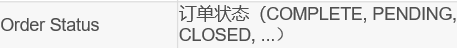
* 而对于预测late diliver,去掉'Days for shipping (real)'，预测这个预计有没错？
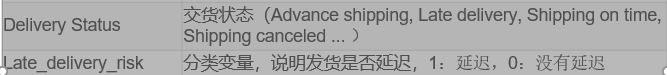

'Late_delivery_risk'中的1，就是'Delivery Status'中的Late delivery，可验证

In [17]:
data_fraud = data.copy()
data_fraud_x = data_fraud.loc[:, data.columns != 'Order Status']
data_fraud_y = data_fraud.loc[:, 'Order Status']

data_fraud_y = data_fraud_y.apply(lambda x: 1 if x == 'SUSPECTED_FRAUD' else 0)

In [18]:
data_late = data.copy()
data_late.drop(columns='Delivery Status', inplace=True)
data_late_x = data_late.loc[:, data_late.columns != 'Late_delivery_risk']
data_late_y = data_late.loc[:, 'Late_delivery_risk']

# 不需要apply了，因为 'Late_delivery_risk'已经做好了label

In [19]:
with open('data_preprocessed.pkl', 'wb') as f:
    pickle.dump(data, f)

with open('data_fraud_x.pkl', 'wb') as f:
    pickle.dump(data_fraud_x, f)
with open('data_fraud_y.pkl', 'wb') as f:
    pickle.dump(data_fraud_y, f)
    
with open('data_late_x.pkl', 'wb') as f:
    pickle.dump(data_late_x, f)
with open('data_late_y.pkl', 'wb') as f:
    pickle.dump(data_late_y, f)

In [20]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

data_fraud_x_cat = data_fraud_x.select_dtypes(include='object').columns.tolist()
for col in data_fraud_x_cat:
    lbe = LabelEncoder()
    data_fraud_x[col] = lbe.fit_transform(data_fraud_x[col])
    #data_fraud_y[col] = lbe.transform(data_fraud_y[col])

data_late_x_cat = data_late_x.select_dtypes(include='object').columns.tolist()
for col in data_late_x_cat:
    lbe = LabelEncoder()
    data_late_x[col] = lbe.fit_transform(data_late_x[col])
    #data_late_y[col] = lbe.transform(data_late_y[col])


mns = MinMaxScaler()
data_fraud_x_nums = data_fraud_x.select_dtypes(exclude='object').columns.tolist()
data_fraud_x[data_fraud_x_nums] = mns.fit_transform(data_fraud_x[data_fraud_x_nums])
#data_fraud_y[data_fraud_x_nums] = mns.transform(data_fraud_y[data_fraud_x_nums])


mns = MinMaxScaler()
data_late_x_nums = data_late_x.select_dtypes(exclude='object').columns.tolist()
data_late_x[data_late_x_nums] = mns.fit_transform(data_late_x[data_late_x_nums])
#data_late_y[data_late_x_nums] = mns.transform(data_late_y[data_late_x_nums])

d:\python\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
d:\python\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
d:\python\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [22]:
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier, XGBRFClassifier
lgb_clf = LGBMClassifier()
xgb_clf = XGBClassifier()
xgbrf_clf = XGBRFClassifier()

#### 上面的模型结果感觉是有点标签泄露的意思，但用LR进行拟合的时候，感觉也没问题呀。

In [23]:
x_train, x_test, y_train, y_test = train_test_split(data_late_x, data_late_y)

lr = LogisticRegression(solver='newton-cg')
lr.fit(x_train, y_train)
y_pred=lr.predict(x_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     19713
           1       1.00      0.97      0.98     25417

    accuracy                           0.98     45130
   macro avg       0.98      0.98      0.98     45130
weighted avg       0.98      0.98      0.98     45130



KFold融合

In [24]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
def training(model, data, label, n):
    result=0
    prediction=[]
    acc_list = []
    # 切分训练集测试集
    x_train, x_test, y_train, y_test = train_test_split(data,label,test_size=0.2)
    # K折模型融合
    skf = StratifiedKFold(n_splits=n, random_state=2020, shuffle=True)
    for train_index, val_index in skf.split(x_train, y_train):
        # train val index
        x_train_, x_val = x_train.iloc[train_index], x_train.iloc[val_index]
        y_train_, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
        # 模型训练
        model.fit(x_train_, y_train_)
        # 模型验证
        y_pred = model.predict(x_test)
        acc_list.append(accuracy_score(y_test, y_pred))
        prediction.append(model.predict(x_test))
        
    for i in range(n):
        # 单纯地均分
        w = 1/n
        result += w*prediction[i]           
    
    result = np.where(result>0.5, 1, 0)
    print(classification_report(y_test, result))    
    return 

#### fraud

In [25]:
training(lr, data_fraud_x, data_fraud_y, n=5)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     35263
           1       0.55      0.18      0.27       841

    accuracy                           0.98     36104
   macro avg       0.76      0.59      0.63     36104
weighted avg       0.97      0.98      0.97     36104



In [26]:
training(xgb_clf, data_fraud_x, data_fraud_y, n=5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35283
           1       0.91      0.90      0.90       821

    accuracy                           1.00     36104
   macro avg       0.95      0.95      0.95     36104
weighted avg       1.00      1.00      1.00     36104



##### late_dilivery

In [27]:
training(xgb_clf, data_late_x, data_late_y, n=5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16229
           1       1.00      1.00      1.00     19875

    accuracy                           1.00     36104
   macro avg       1.00      1.00      1.00     36104
weighted avg       1.00      1.00      1.00     36104



In [28]:
training(lr, data_late_x, data_late_y, n=5)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     16247
           1       0.97      1.00      0.98     19857

    accuracy                           0.98     36104
   macro avg       0.98      0.98      0.98     36104
weighted avg       0.98      0.98      0.98     36104

